In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',35)

In [4]:
limit=1000
offset=0
params={
    '$limit':limit,
    '$offset':offset
}


In [5]:
url='https://data.buffalony.gov/resource/d6g9-xbgu.json'

In [6]:
df_list=[]
while True:
    params={
        '$limit':limit,
        '$offset':offset
    }
    response=requests.get(url,params=params)
    data=response.json()
    df_page=pd.DataFrame(data)
    if df_page.empty:
        break
    df_list.append(df_page)
    offset+=limit
df=pd.concat(df_list,ignore_index=True)

In [7]:
df['incident_datetime']=pd.to_datetime(df['incident_datetime'],format='%Y-%m-%dT%H:%M:%S.%f')

In [8]:
df=df.replace('UNKNOWN',np.nan)

In [9]:
df=df.sort_values(by='incident_datetime')

In [10]:
df['hour_of_day']=pd.to_datetime(df['hour_of_day'],format='%H')
df['hour_of_day']=df['hour_of_day'].dt.hour

In [11]:
df=df[df['incident_datetime']>='2009']

In [12]:
df=df.reset_index(drop=True)

In [13]:
df['incident_type_primary']=df['incident_type_primary'].str.lower()

In [14]:
sexual_crimes = ['other sexual offense','sexual assault', 'rape', 'sexual abuse', 'sodomy']
assault_crimes=['agg assault on p/officer', 'aggr assault', 'assault']
vehicle_crimes=['theft of vehicles', 'uuv','theft of vehicle']
theft_crimes=['burglary', 'larceny/theft','robbery', 'theft of services','theft', 'breaking & entering']
murder_crimes=['crim negligent homicide', 'homicide', 'manslaughter', 'murder']
df['incident_type_primary'] = df['incident_type_primary'].replace(sexual_crimes, 'sexual crime')
df['incident_type_primary'] = df['incident_type_primary'].replace(assault_crimes, 'assault crime')
df['incident_type_primary'] = df['incident_type_primary'].replace(vehicle_crimes, 'vehicle crime')
df['incident_type_primary'] = df['incident_type_primary'].replace(theft_crimes,'theft crimes')
df['incident_type_primary'] = df['incident_type_primary'].replace(murder_crimes,'murder crimes')

2.1.Crime rates by month in buffalo

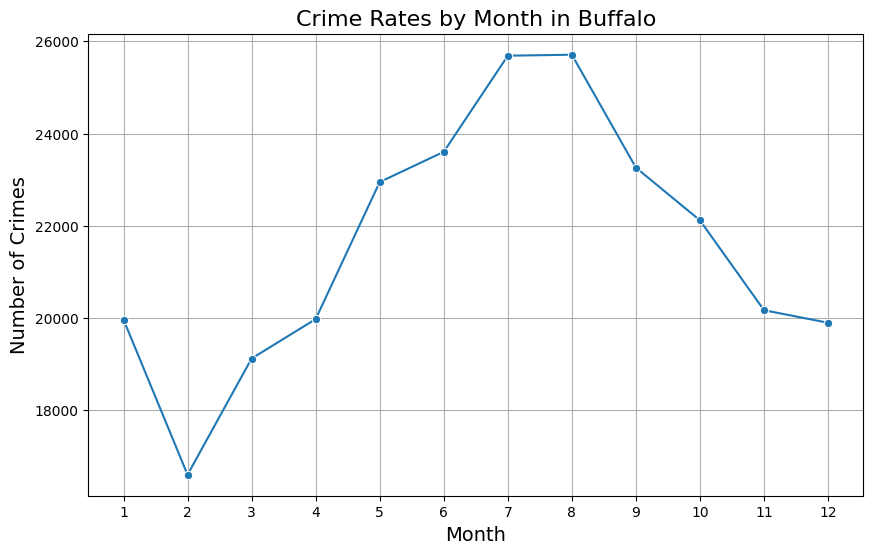

/var/folders/74/kxw5x5pj4m37f03sw19cwf4c0000gp/T/ipykernel_36355/1345439122.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_by_season.index, y=crime_by_season.values, palette='Set2')


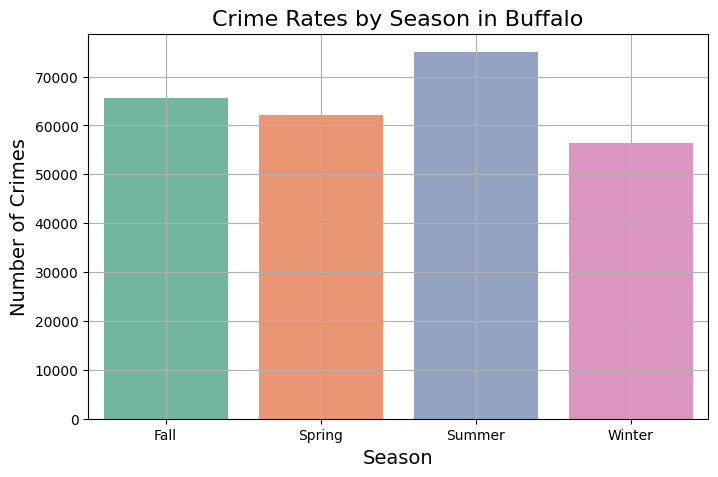

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'df' dataframe is your clean dataset, rename it to df_filtered
df_filtered = df  # Assign 'df' to 'df_filtered'

# Extract the 'month' and 'season' from the incident_datetime column
df_filtered['month'] = df_filtered['incident_datetime'].dt.month
df_filtered['season'] = df_filtered['incident_datetime'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Optional: Map season numbers to season names
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df_filtered['season'] = df_filtered['season'].map(season_map)

# Group the data by 'month' to see crime distribution over the months
crime_by_month = df_filtered.groupby('month').size()

# Group the data by 'season' to see crime distribution over the seasons
crime_by_season = df_filtered.groupby('season').size()

# Plot crime rates by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=crime_by_month.index, y=crime_by_month.values, marker='o')
plt.title('Crime Rates by Month in Buffalo', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Plot crime rates by season
plt.figure(figsize=(8, 5))
sns.barplot(x=crime_by_season.index, y=crime_by_season.values, palette='Set2')
plt.title('Crime Rates by Season in Buffalo', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.grid(True)
plt.show()

# Optional: If you have weather data, you can also merge it here to analyze the relationship
# For example, merging weather info such as 'temperature' to analyze the correlation with crime rates
# df_weather = pd.read_csv('weather_data.csv')  # Example weather dataset
# df_filtered = pd.merge(df_filtered, df_weather, on='incident_datetime', how='left')

### Hypothesis for "Crime Rates by Season in Buffalo":

1. **Hypothesis 1: Crime rates are higher during the summer than in other seasons.**
   - **Reasoning**: Warmer temperatures in the summer increase outdoor activities, public events, and interactions, creating more opportunities for crimes like theft, assault, and vandalism. People tend to spend more time outside, leading to heightened social interactions, which could escalate to violent or petty crimes.
   
2. **Hypothesis 2: Winter sees a decrease in overall crime rates due to harsh weather conditions.**
   - **Reasoning**: In colder months, especially in cities like Buffalo, people are less likely to be outside for extended periods. As a result, fewer opportunities exist for outdoor crimes. Additionally, transportation challenges due to snow and freezing temperatures could reduce the mobility of criminals.

3. **Hypothesis 3: Certain types of crimes, such as domestic violence or property crimes (e.g., burglary), may increase during winter due to people spending more time indoors.**
   - **Reasoning**: While overall crime rates may drop, indoor crimes or crimes related to stressors such as financial hardships, holidays, or family tensions may rise during winter months.

4. **Hypothesis 4: Fall sees a rise in property-related crimes, such as burglary, with people returning from summer vacations.**
   - **Reasoning**: Fall marks the end of vacation periods, where homes left unattended might become more vulnerable to burglaries. Additionally, with school starting, there might be an increase in youth-related crimes near schools and public spaces.

5. **Hypothesis 5: Crimes increase during specific seasonal events or holidays like New Year's Eve or Halloween.**
   - **Reasoning**: Large gatherings and celebrations during specific holidays (especially in the fall and winter seasons) lead to a spike in certain crimes, such as vandalism, public disturbances, and DUIs.

---
 Objectives:

Understanding **crime rates by season** helps identify patterns that are critical for public safety initiatives and crime prevention strategies. Seasonal variations in crime can inform how law enforcement allocates resources, how public awareness campaigns are timed, and how city planning might mitigate high-crime periods. For example:

- **Resource Allocation**: If summer shows a spike in crime, police forces can increase patrols in high-risk areas during these months.
- **Targeted Interventions**: If certain crimes (e.g., domestic violence or burglary) spike during specific seasons, social programs or intervention efforts could be planned accordingly.
- **Public Awareness**: Educating the public on crime trends by season can help individuals take precautions (e.g., home security measures during fall or winter).

These insights are not only valuable for law enforcement and policymakers but also for communities to better understand how crime rates fluctuate and to take actions to safeguard themselves.

---

### Significance:

This enables the exploration of seasonal trends, which are often overlooked in crime analysis. Crime is not random but influenced by environmental, social, and economic factors, many of which are seasonal. By predicting crime types based on seasonal trends

Predict future crime types: Using historical data, we can forecast which crime types are more likely to occur in specific months or seasons, allowing for better strategic planning and preventive measures.
Optimize police and community efforts: Efficient allocation of resources is crucial. If our predictions indicate that certain types of crimes, like violent crimes, increase during summer, law enforcement can adjust their efforts accordingly to mitigate risks.
Inform policymaking: Seasonal crime data can help governments introduce targeted policies or initiatives that address spikes in specific crime types during particular seasons, such as heightened surveillance during peak times for property crimes.

It provide valuable insights that contribute to building a safer community and enhance the effectiveness of preventive measures year-round.

In [17]:
# Group the data by 'season' to get the total number of crimes in each season
crime_by_season = df_filtered.groupby('season').size()

# Display the total number of crimes in each season
print("Total number of crimes in each season:")
print(crime_by_season)


Total number of crimes in each season:
season
Fall      65552
Spring    62051
Summer    75001
Winter    56472
dtype: int64


2.2. Crime rates in holidays like winter holidays new year,summer holidays and christmas

Number of crimes during holiday periods:
holiday_period
Non-Holiday        203615
Summer Holidays     48950
Winter Holidays      6511
dtype: int64


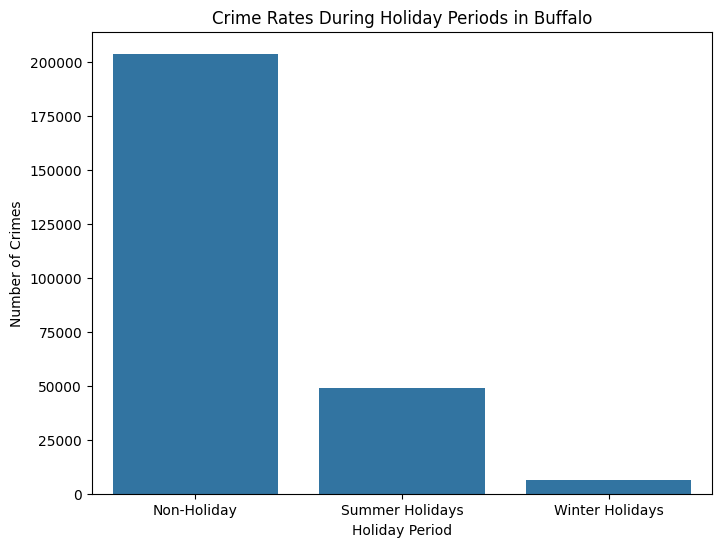

In [18]:
#how are the crime rates in holidays like winter holidays new year ,summer holidays and christmas

import matplotlib.pyplot as plt
# Extract the year and month from the incident_datetime column
df_filtered['year'] = df_filtered['incident_datetime'].dt.year
df_filtered['month'] = df_filtered['incident_datetime'].dt.month
df_filtered['day'] = df_filtered['incident_datetime'].dt.day

# Define a function to determine if a date falls within a holiday period
def is_holiday(row):
    month = row['month']
    day = row['day']

    if (month == 12 and day >= 24) or (month == 1 and day <= 2):  # Christmas and New Year's
        return 'Winter Holidays'
    elif (month == 7 and day >= 1) or (month == 9 and day <= 31):  # Summer holidays (July and August)
        return 'Summer Holidays'
    else:
        return 'Non-Holiday'


# Apply the function to create a new column indicating whether the date is a holiday
df_filtered['holiday_period'] = df_filtered.apply(is_holiday, axis=1)

# Group the data by holiday period and calculate the number of crimes
holiday_crime_counts = df_filtered.groupby('holiday_period').size()

# Print the results
print("Number of crimes during holiday periods:")
print(holiday_crime_counts)

# Create a bar plot to visualize the crime rates during holidays
plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_crime_counts.index, y=holiday_crime_counts.values)
plt.title('Crime Rates During Holiday Periods in Buffalo')
plt.xlabel('Holiday Period')
plt.ylabel('Number of Crimes')
plt.show()


### Hypothesis for "How are crime rates during holidays like Winter Holidays, New Year, Summer Holidays, and Christmas?"

1. **Hypothesis 1: Crime rates increase during major holiday periods like New Year’s Eve and Christmas.**
   - **Reasoning**: During holidays like Christmas and New Year, people tend to gather in large groups for celebrations, leading to higher rates of alcohol consumption, public disturbances, and violent crimes such as fights. Additionally, with homes often left unattended during vacation, property crimes like burglary and theft may increase.

2. **Hypothesis 2: Summer holidays see a spike in petty crimes and public disturbances.**
   - **Reasoning**: Summer holidays, especially around the 4th of July and vacation periods, encourage outdoor activities, parties, and festivals. These social gatherings increase opportunities for crimes like theft, vandalism, and minor altercations. Warmer weather also tends to lead to more people being out and about, increasing the chances for crimes.

3. **Hypothesis 3: Winter holidays like Christmas and New Year see higher rates of domestic violence and drunk-driving-related incidents.**
   - **Reasoning**: During winter holidays, people spend more time indoors with family, which may escalate tensions in some households, resulting in an increase in domestic violence. Additionally, the consumption of alcohol during celebrations (especially on New Year’s Eve) can lead to an increase in drunk-driving offenses and accidents.

4. **Hypothesis 4: Non-holiday periods have lower crime rates compared to holiday periods, especially for specific crimes like theft, burglary, and DUI.**
   - **Reasoning**: Non-holiday periods may see lower crime rates overall because people are more focused on routine activities such as work or school. In contrast, holiday periods may disrupt routines and contribute to risky behaviors like excessive drinking, leading to more opportunities for criminal activities.

---

###  Objectives:

Understanding how crime rates fluctuate during holiday periods can directly inform **public safety initiatives** and **crime prevention strategies**. By identifying patterns in crime during these periods, law enforcement and communities can:

1. **Increase awareness**: If crime rates spike during holidays, public awareness campaigns can be launched to encourage safer behaviors, such as preventing drunk driving or securing homes during vacations.
2. **Strategic deployment of resources**: Law enforcement can increase patrols and presence during high-risk holiday periods, focusing on areas prone to public disturbances or theft.
3. **Holiday-specific interventions**: Community programs, like offering free transportation during New Year’s Eve or organizing community events, can help reduce risky behaviors and prevent crime.

This is particularly valuable as it addresses **predictable patterns** during specific periods of the year when certain types of crimes are likely to rise, allowing for **preemptive action** by law enforcement.

---

### Significance:
Predicting the crime type in Buffalo—lies in the unique crime patterns that emerge during these times. Holidays create specific social conditions that influence the types and frequency of crimes, providing valuable insights for our prediction model.

Altered Crime Dynamics: During holidays, normal routines are disrupted, leading to distinct crime trends. By incorporating holidays into our model, we can more accurately predict crime types that are likely to increase, such as theft, burglary, or alcohol-related offenses, during these periods.

Targeted Crime Prevention: Predicting the crime types that peak during holidays enables law enforcement to allocate resources more strategically. For instance, if your model shows a rise in DUIs or domestic violence during major holidays, police efforts can be focused on high-risk areas and times.

Community Awareness: Understanding how crime types shift during holiday seasons allows local authorities to better inform the public, encouraging citizens to take specific precautions, such as securing their homes while away or avoiding high-risk behaviors like excessive alcohol consumption.

Strategic Policymaking: Governments and policymakers can use our predictions to implement temporary measures or campaigns during holiday seasons to address specific crime surges, such as promoting designated driver programs or increasing surveillance in vulnerable areas.

By accounting for holiday-specific crime trends in Buffalo, our problem statement becomes more impactful, offering practical insights that contribute to a safer community

2.3. Neighborhoods in buffalo experience the highest crime rates

Top 10 neighborhoods with the highest crime rates:
address_1
2100 Block ELMWOOD AV     1893
2600 Block DELAWARE AV    1308
600 Block AMHERST ST      1209
2200 Block DELAWARE AV    1208
300 Block AMHERST ST      1053
400 Block NIAGARA ST       893
400 Block GRIDER ST        845
1000 Block HERTEL AV       832
900 Block BROADWAY         769
200 Block W FERRY ST       654
dtype: int64


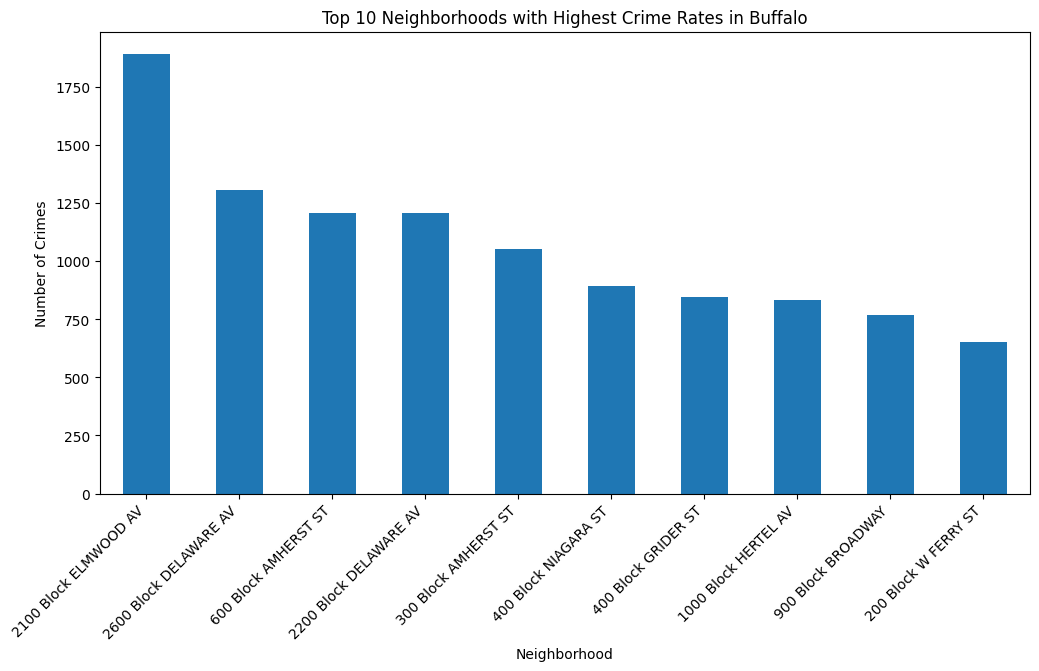

In [19]:
#  Which neighborhoods in Buffalo experience the highest crime rates?

import matplotlib.pyplot as plt
# Group the data by 'address_1' (neighborhood) and count the number of crimes in each neighborhood
crime_by_neighborhood = df_filtered.groupby('address_1').size()

# Sort the neighborhoods by crime count in descending order
crime_by_neighborhood_sorted = crime_by_neighborhood.sort_values(ascending=False)

# Display the top 10 neighborhoods with the highest crime rates
print("Top 10 neighborhoods with the highest crime rates:")
print(crime_by_neighborhood_sorted.head(10))

# You can also visualize this data with a bar plot
plt.figure(figsize=(12, 6))
crime_by_neighborhood_sorted.head(10).plot(kind='bar')
plt.title('Top 10 Neighborhoods with Highest Crime Rates in Buffalo')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()


### Hypothesis for "Which neighborhoods in Buffalo experience the highest crime rates?"

1. **Hypothesis 1: Low-income neighborhoods experience higher crime rates than affluent areas.**
   - **Reasoning**: Economic stress and limited access to resources in low-income neighborhoods may lead to higher crime rates. Poverty often correlates with issues such as unemployment, poor education, and reduced social services, all of which are factors that can contribute to higher crime rates.

2. **Hypothesis 2: Crime rates are higher in densely populated neighborhoods.**
   - **Reasoning**: Densely populated areas tend to have more interactions between people, which can lead to more opportunities for criminal activity. Increased anonymity in these neighborhoods might also reduce the chances of criminals being caught, which may lead to higher crime rates.

3. **Hypothesis 3: Commercial areas and neighborhoods with high traffic from tourists or non-residents have elevated crime rates.**
   - **Reasoning**: Areas with a significant influx of people, such as neighborhoods near shopping centers, bars, or public transit hubs, may see increased crimes like theft, vandalism, and pickpocketing. The higher foot traffic in these neighborhoods can provide more opportunities for crimes to occur.

4. **Hypothesis 4: Neighborhoods with inadequate policing or poor community engagement experience higher crime rates.**
   - **Reasoning**: Areas with lower police presence or poor law enforcement-community relationships may have higher crime rates. Limited patrols or slower response times might lead to more crime incidents going unaddressed, further emboldening criminal activities.

5. **Hypothesis 5: Crime hotspots in certain neighborhoods are concentrated near public housing or areas with a higher concentration of rental properties.**
   - **Reasoning**: Transient populations in rental areas or public housing may have less neighborhood cohesion, reducing collective efforts to deter crime. This can lead to an increase in criminal activities, especially related to property crimes or vandalism.

---

###Objectives:

Understanding **which neighborhoods have the highest crime rates** allows for a **data-driven approach to crime prevention**. By identifying high-crime neighborhoods, authorities and community leaders can focus on:

1. **Resource Allocation**: Law enforcement can allocate more patrols, resources, and crime prevention programs in the neighborhoods that experience higher crime rates.
2. **Community-Based Interventions**: For high-crime areas, the community can work with law enforcement and local governments to implement initiatives such as neighborhood watch programs, community engagement activities, or improved lighting and safety infrastructure.
3. **Socioeconomic Improvements**: By pinpointing neighborhoods with elevated crime rates, policymakers can focus on improving the socioeconomic conditions in those areas, such as better education, job creation, or housing programs, which may ultimately reduce crime.

---

### Significance:

The significance of neighborhood-specific crime patterns relates directly to predicting the crime type in Buffalo.

Data-Driven Policing: In addition to considering seasonal trends, our analysis can identify which neighborhoods are more prone to specific crime types. For example, violent crimes may cluster in certain areas, while property crimes may be more common in others. By predicting the crime type by neighborhood, law enforcement can focus their efforts where they are needed most, leading to more effective crime prevention and resource allocation.

Urban Planning and Crime Prevention: Predicting crime types based on spatial data allows urban planners and local authorities in Buffalo to take proactive steps to improve neighborhood safety. For instance, if your analysis shows that burglaries spike in certain areas during winter, targeted interventions like better street lighting or increased surveillance can be implemented. This makes your problem statement significant for guiding urban planning decisions that enhance public safety.

Targeted Community Impact: Understanding how crime varies across different neighborhoods enables a more equitable approach to improving the quality of life for Buffalo residents. Predicting crime types and focusing resources on high-crime areas ensures that vulnerable communities get the attention they need. This makes your work essential for addressing localized issues such as fear of violence or property damage, contributing to the overall safety and well-being of the city.

By incorporating spatial distribution into our analysis, our problem statement becomes highly relevant for creating targeted interventions that address both the where and the what of crime in Buffalo, leading to more efficient crime reduction strategies.

4.Data cleaning

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (assuming it's a JSON file)
df = pd.read_json('https://data.buffalony.gov/resource/d6g9-xbgu.json')

# Convert columns with dictionaries to strings before dropping duplicates
# Assuming columns with dictionary values are 'location_1', 'location'
# Update this with your actual column names containing dictionary values
for column in ['location_1', 'location']:
    if column in df.columns:  # Check if column exists in DataFrame
        df[column] = df[column].astype(str)

# 1. Remove duplicates
df.drop_duplicates(inplace=True)
print(f"Step 1: Removed duplicates. Remaining rows: {df.shape[0]}")

# 2. Handle missing values: Remove rows with missing 'latitude' and 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])
print(f"Step 2: Removed rows with missing latitude and longitude. Remaining rows: {df.shape[0]}")

# 3. Handle missing values: Replace missing values in 'incident_description' with a placeholder
df['incident_description'] = df['incident_description'].fillna('Unknown description')
print("Step 3: Filled missing 'incident_description' with 'Unknown description'.")

# 4. Correct inconsistent text cases in 'incident_type_primary' (convert to lowercase)
df['incident_type_primary'] = df['incident_type_primary'].str.lower()
print("Step 4: Converted 'incident_type_primary' column to lowercase.")

# 5. Strip leading/trailing whitespace from text columns (e.g., 'incident_description')
df['incident_description'] = df['incident_description'].str.strip()
df['address_1'] = df['address_1'].str.strip()
print("Step 5: Stripped leading and trailing whitespace in text columns.")

# 6. Remove unwanted text or special characters in 'incident_description'
df['incident_description'] = df['incident_description'].str.replace(r'\s+', ' ', regex=True)
df['incident_description'] = df['incident_description'].str.replace('Buffalo Police are investigating this report of a crime.*', 'under investigation', regex=True)
print("Step 6: Cleaned up unnecessary text in 'incident_description'.")

# 7. Convert 'incident_datetime' column to datetime format
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'], errors='coerce')
print("Step 7: Converted 'incident_datetime' to datetime format.")

# 8. Remove rows with invalid or missing 'incident_datetime'
df = df.dropna(subset=['incident_datetime'])
print(f"Step 8: Removed rows with missing 'incident_datetime'. Remaining rows: {df.shape[0]}")

# 9. Replace invalid numerical values: Replace 'UNKNOWN' or invalid entries in 'latitude' and 'longitude' with NaN
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
print("Step 9: Converted invalid 'latitude' and 'longitude' entries to NaN.")

# 10. Remove rows with NaN values in 'latitude' or 'longitude'
df = df.dropna(subset=['latitude', 'longitude'])
print(f"Step 10: Removed rows with NaN in 'latitude' or 'longitude'. Remaining rows: {df.shape[0]}")

# Final cleaned dataset summary
print("Data cleaning complete!")
df.info()

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_crime_dataset_buffalo.csv', index=False)


Step 1: Removed duplicates. Remaining rows: 1000
Step 2: Removed rows with missing latitude and longitude. Remaining rows: 990
Step 3: Filled missing 'incident_description' with 'Unknown description'.
Step 4: Converted 'incident_type_primary' column to lowercase.
Step 5: Stripped leading and trailing whitespace in text columns.
Step 6: Cleaned up unnecessary text in 'incident_description'.
Step 7: Converted 'incident_datetime' to datetime format.
Step 8: Removed rows with missing 'incident_datetime'. Remaining rows: 990
Step 9: Converted invalid 'latitude' and 'longitude' entries to NaN.
Step 10: Removed rows with NaN in 'latitude' or 'longitude'. Remaining rows: 834
Data cleaning complete!
<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   case_number                  834 non-null    object        
 1   

5.EDA

EDA Steps for the question "Crime Rates by Season in Buffalo" for hypothesis 1:Crime rates are higher during the summer than in other seasons.



1. Understand the Structure of the Data
Step: Examine the columns and data types to ensure the structure aligns with your analysis goal.
Action:
python
Copy code
print(df.info())  # Check data types and structure
print(df.head())  # View first few rows of data
Goal: Ensure that the dataset contains relevant columns such as incident_datetime, latitude, longitude, incident_description, etc., and that they are in the correct format.

2. Granularity
Step: Assess the granularity of the data, i.e., how fine or coarse the individual records are.
Action:
python
Copy code
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'], errors='coerce')  # Convert datetime column if necessary
print(df['incident_datetime'].min(), df['incident_datetime'].max())  # Check the time range of data
Goal: Verify that each row corresponds to a single crime incident and that there are no unnecessary groupings (e.g., daily aggregates instead of individual records).


"Crime rates are higher during the summer than in other seasons," helps predict crime types by revealing seasonal patterns where crimes like assaults, theft, or DUIs may increase. This insight refines your model by linking specific crime types to summer months, enabling better resource allocation and more accurate forecasting based on historical data.



EDA Steps for the question "Crime Rates by Season in Buffalo" for hypothesis 2: :Winter sees a decrease in overall crime rates due to harsh weather conditions.

1. Understanding the Structure of the Data
EDA Step:
Check the columns in the dataset, especially incident_datetime, to ensure it includes the exact timing of crimes (date and time).
Review the data types to confirm that datetime values are correctly formatted for temporal analysis.
Relevance to Hypothesis:
Allows you to ensure that the incident_datetime column is available and can be used to extract both month and season data for your analysis of winter crimes.
2. Granularity Assessment
EDA Step:
Assess how detailed each crime record is (e.g., does it provide the exact date, or just the month?).
Determine whether there are multiple data points per day or whether the dataset is aggregated over a longer period.
Relevance to Hypothesis:
The finer the granularity, the more precise your conclusions will be about winter crime trends. For instance, day-by-day granularity may reveal more insight into specific harsh weather periods during winter.


"Winter sees a decrease in overall crime rates due to harsh weather conditions,"helps narrow down the prediction of crime types by suggesting a seasonal pattern. It implies that certain crimes, like outdoor or violent crimes, may decrease in winter, while indoor crimes (e.g., domestic violence or cybercrime) may be more prevalent. This seasonal insight refines our crime type predictions based on weather conditions.

EDA Steps for the question "Crime Rates during holidays in buffalo" for hypothesis 1:Crime rates increase during major holiday periods like New Year’s Eve and Christmas.

1. Data Cleaning:
Remove Missing/NaN Values: Ensure that missing or invalid data points (e.g., missing dates or crime types) are removed or imputed.
Convert Date Columns: Make sure the date columns like incident_datetime are in proper datetime format to extract relevant time-based features like month, year, and day.
2. Data Transformation:
Extract Holidays: Use a function to categorize each date into one of the holiday periods (e.g., Christmas, New Year's, or non-holiday). This is shown in the code with the function is_holiday which checks if the date falls within defined holiday ranges.
Create Time-Based Features: Create additional columns like year, month, day from the incident_datetime to facilitate time-based analysis.

This helps to predict the types of crime that are more likely to increase during major holidays, such as property crimes during Christmas (due to vacant homes) or alcohol-related crimes on New Year's Eve. By identifying these trends, we can enhance the accuracy of our crime type predictions for specific time periods. This allows for more targeted crime prevention strategies during holidays.



EDA Steps for the question "Crime Rates during holidays in buffalo" for hypothesis 2:Summer holidays see a spike in petty crimes and public disturbances


1.Data Cleaning and Preparation:

Ensure the dataset is structured properly, with no missing or null values in key columns such as incident date, crime type, and location.
Extract relevant time components (year, month, day) from the incident_datetime column.
Define and apply the is_holiday function to classify dates as 'Summer Holidays,' 'Winter Holidays,' or 'Non-Holiday.'


2.Data Granularity:

Determine the level of detail by focusing on daily crime counts and types during different holiday periods, particularly during summer months (July and August).
Examine the distribution of petty crimes and public disturbances by filtering for specific crime types (e.g., theft, vandalism, disorderly conduct).

This is useful for predicting crime types in Buffalo because it highlights a specific seasonal trend that can be analyzed with historical crime data. By focusing on summer holidays,we can identify patterns and correlations with increased incidents of petty crimes, allowing for more accurate predictions. This insight enables law enforcement and community planners to allocate resources effectively and implement targeted interventions during high-risk periods.
